## Prueba

In [ ]:
#!pip install dataprep
#!pip install datascience

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns
import numpy as np
from datascience import *
from dataprep.eda import create_report
import scipy as sc
import statsmodels.formula.api as sm

In [ ]:
#from google.colab import files 
  
  
#uploaded = files.upload()

Saving heart_dataset.csv to heart_dataset.csv


In [ ]:
df = pd.read_csv("heart_dataset.csv")
df = df.drop(columns='time')
df1 = df.drop(columns=['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT'])
df



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [ ]:
df1

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


In [ ]:
namescolumns = df.columns
namescolumns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
DEATH_EVENT                   int64
dtype: object

## escalamiento max-min todos los datos

In [ ]:
df_normaliz = pd.DataFrame(df)

df_normaliz = df.loc[:,['creatinine_phosphokinase',	'ejection_fraction','platelets'	,'serum_creatinine',	'serum_sodium']]
datos_min_max = preprocessing.MinMaxScaler().fit_transform(df_normaliz)

datos_min_max

array([[ 0.07131921,  0.09090909,  0.29082313,  0.15730337,  0.48571429],
       [ 1.        ,  0.36363636,  0.28883262,  0.06741573,  0.65714286],
       [ 0.01569278,  0.09090909,  0.16595951,  0.08988764,  0.45714286],
       ..., 
       [ 0.25988773,  0.6969697 ,  0.86907504,  0.03370787,  0.71428571],
       [ 0.30492473,  0.36363636,  0.13928961,  0.1011236 ,  0.77142857],
       [ 0.02207196,  0.46969697,  0.44841799,  0.12359551,  0.65714286]])

## media, mediana, promedio, desviacion estandar, varianza.


In [ ]:
promedio_age = df['age'].mean()    #media
mediana_age  = df['age'].median()  #mediana
desviacion_age = df['age'].std()   #Desviacion
varianza_age = df['age'].var()     #varianza
print(f'Promedio de los años: {promedio_age}')

Promedio de los años: 60.83389297658862


In [ ]:
promedio_ejection_fraction = df['ejection_fraction'].mean()    #media
mediana_ejection_fraction  = df['ejection_fraction'].median()  #mediana
desviacion_ejection_fraction = df['ejection_fraction'].std()   #Desviacion
varianza_ejection_fraction = df['ejection_fraction'].var()     #varianza
print(f'Promedio en el fracción de eyección: {promedio_ejection_fraction}')

Promedio en el fracción de eyección: 38.08361204013378


In [ ]:
promedio_serum_creatinine = df['serum_creatinine'].mean()    #media
mediana_serum_creatinine  = df['serum_creatinine'].median()  #mediana
desviacion_serum_creatinine = df['serum_creatinine'].std()   #Desviacion
varianza_serum_creatinine = df['serum_creatinine'].var()     #varianza
print(f'Promedio en el suero_creatinina : {promedio_serum_creatinine}')

Promedio en el suero_creatinina : 1.3938795986622072


In [ ]:
promedio_serum_sodium = df['serum_sodium'].mean()    #media
mediana_serum_sodium  = df['serum_sodium'].median()  #mediana
desviacion_serum_sodium = df['serum_sodium'].std()   #Desviacion
varianza_serum_sodium = df['serum_sodium'].var()     #varianza
print(f'Promedio en el sodio_suero : {promedio_serum_sodium}')

Promedio en el sodio_suero : 136.62541806020067


In [ ]:
promedio_platelets = df['platelets'].mean()    #media
mediana_platelets  = df['platelets'].median()  #mediana
desviacion_platelets = df['platelets'].std()   #Desviacion
varianza_platelets = df['platelets'].var()     #varianza
print(f'Promedio en el plaquetas: {promedio_platelets}')

Promedio en el plaquetas: 263358.02926421404


In [ ]:
promedio_creatinine_phosphokinase = df['creatinine_phosphokinase'].mean()    #media
mediana_creatinine_phosphokinase = df['creatinine_phosphokinase'].median()  #mediana
desviacion_creatinine_phosphokinase = df['creatinine_phosphokinase'].std()   #Desviacion
varianza_creatinine_phosphokinase = df['creatinine_phosphokinase'].var()     #varianza
print(f'Promedio en el promedioa_creatinina_fosfocinasa: {promedio_creatinine_phosphokinase}')

Promedio en el promedioa_creatinina_fosfocinasa: 581.8394648829432


## Normaliza en funcion de la norma del vector

In [ ]:
datos_normalizer = preprocessing.Normalizer().transform(df_normaliz.T)
datos_normalizer = datos_normalizer.T
# normalizado = X / raíz_cuadrada( X_1^2 + X_2^2 + X_3^2 + ...)

datos_normalizer

array([[ 0.0297864 ,  0.02900693,  0.05456274,  0.06333861,  0.05499847],
       [ 0.40232106,  0.05511317,  0.05422467,  0.03666972,  0.05753686],
       [ 0.00747219,  0.02900693,  0.03335534,  0.04333694,  0.05457541],
       ..., 
       [ 0.10542951,  0.08702079,  0.15277568,  0.02666889,  0.05838299],
       [ 0.12349583,  0.05511317,  0.0288256 ,  0.04667055,  0.05922913],
       [ 0.01003116,  0.06526559,  0.08132937,  0.05333778,  0.05753686]])

## Estandariza (desv_std = 1, media = 0)

In [ ]:
datos_standard_scaler = preprocessing.StandardScaler().fit_transform(df_normaliz)
# estandarizado = (X - media) / std

datos_robust_scaler = preprocessing.RobustScaler().fit_transform(df_normaliz)
# estandarizado = (X - rango_intercuartílico) / std

datos_standard_scaler, datos_robust_scaler


(array([[  1.65728387e-04,  -1.53055953e+00,   1.68164843e-02,
           4.90056987e-01,  -1.50403612e+00],
        [  7.51463953e+00,  -7.07675018e-03,   7.53566018e-09,
          -2.84552352e-01,  -1.41976151e-01],
        [ -4.49938761e-01,  -1.53055953e+00,  -1.03807313e+00,
          -9.09000174e-02,  -1.73104612e+00],
        ..., 
        [  1.52597865e+00,   1.85495776e+00,   4.90208200e+00,
          -5.75030855e-01,   3.12043840e-01],
        [  1.89039811e+00,  -7.07675018e-03,  -1.26338936e+00,
           5.92615005e-03,   7.66063830e-01],
        [ -3.98321274e-01,   5.85388775e-01,   1.34823057e+00,
           1.99578485e-01,  -1.41976151e-01]]),
 array([[  7.13211600e-01,  -1.20000000e+00,   3.29670330e-02,
           1.60000000e+00,  -1.16666667e+00],
        [  1.63501611e+01,   0.00000000e+00,   1.49234066e-02,
           0.00000000e+00,  -1.66666667e-01],
        [ -2.23415682e-01,  -1.20000000e+00,  -1.09890110e+00,
           4.00000000e-01,  -1.33333333e+00],
   

## graficar la normalizacion

In [ ]:
%matplotlib inline 

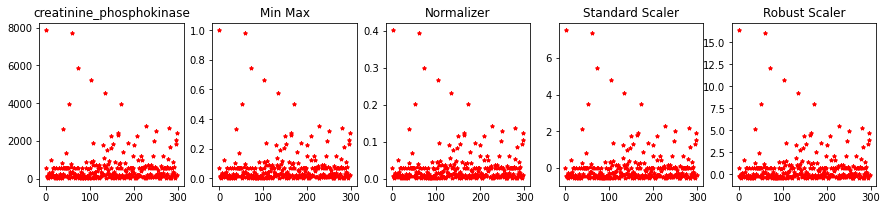

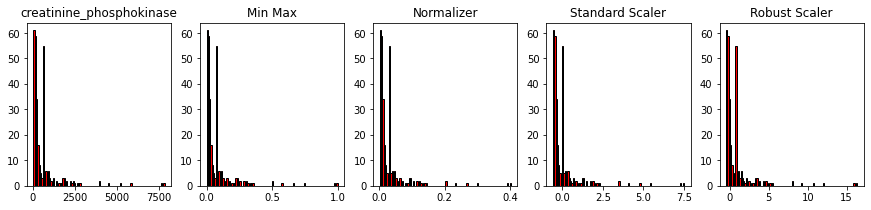

In [ ]:
# convierte vectores de numpy a DataFrames para graficarlos

datos_min_max = pd.DataFrame(datos_min_max, columns=['creatinine_phosphokinase',     'ejection_fraction','platelets', 'serum_creatinine','serum_sodium'])
datos_normalizer = pd.DataFrame(datos_normalizer, columns=['creatinine_phosphokinase', 'ejection_fraction','platelets',   'serum_creatinine',	'serum_sodium'])
datos_standard_scaler = pd.DataFrame(datos_standard_scaler, columns=['creatinine_phosphokinase', 'ejection_fraction','platelets'	,'serum_creatinine',	'serum_sodium'])
datos_robust_scaler = pd.DataFrame(datos_robust_scaler, columns=['creatinine_phosphokinase',	'ejection_fraction','platelets'	,'serum_creatinine',	'serum_sodium'])

# crea una figura con 5 subfiguras para comparar los métodos
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# crea y personaliza series de datos
ax1.set_title("creatinine_phosphokinase")
ax1.plot(df_normaliz["creatinine_phosphokinase"], linewidth=0, marker="*", color="red", markersize=4)

ax2.set_title("Min Max")
ax2.plot(datos_min_max["creatinine_phosphokinase"], linewidth=0, marker="*", color="red", markersize=4)

ax3.set_title("Normalizer")
ax3.plot(datos_normalizer["creatinine_phosphokinase"], linewidth=0, marker="*", color="red", markersize=4)
#ax3.set_ylim(0, 1)

ax4.set_title("Standard Scaler")
ax4.plot(datos_standard_scaler["creatinine_phosphokinase"], linewidth=0, marker="*", color="red", markersize=4)

ax5.set_title("Robust Scaler")
ax5.plot(datos_robust_scaler["creatinine_phosphokinase"], linewidth=0, marker="*", color="red", markersize=4)

plt.show()

# crea una figura con 5 subfiguras para mostrar histogramas
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# crea y personaliza series de datos de los histogramas
ax1.set_title("creatinine_phosphokinase")
ax1.hist(df_normaliz["creatinine_phosphokinase"], color="red", bins=100)

ax2.set_title("Min Max")
ax2.hist(datos_min_max["creatinine_phosphokinase"], color="red", bins=100)

ax3.set_title("Normalizer")
ax3.hist(datos_normalizer["creatinine_phosphokinase"], color="red", bins=100)

ax4.set_title("Standard Scaler")
ax4.hist(datos_standard_scaler["creatinine_phosphokinase"], color="red", bins=100)

ax5.set_title("Robust Scaler")
ax5.hist(datos_robust_scaler["creatinine_phosphokinase"], color="red", bins=100)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


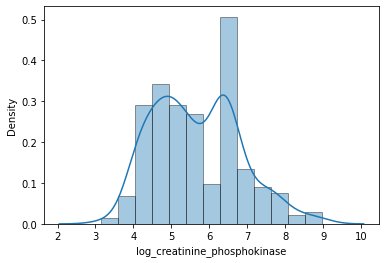

In [ ]:
### Use log to transform the crm column
df['log_creatinine_phosphokinase'] = np.log(df['creatinine_phosphokinase'])
## plot density log_crim
sns.distplot(df['log_creatinine_phosphokinase'])

## Estadisticas descriptivas de los datos originales, contando si hay valores perdidos y que otros problemas de simetria puede tener.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


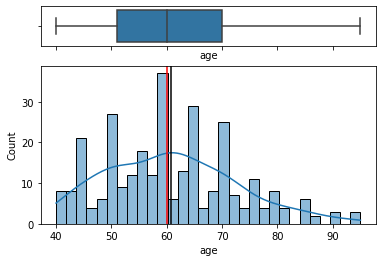

In [ ]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(df["age"], ax=ax[0]) #boxplot
sns.histplot(df["age"], ax=ax[1], kde=True, bins = 30) #histagrana
ax[1].axvline(mediana_age, color='red')
ax[1].axvline(promedio_age, color='black')


## graficado

In [ ]:
df2 = Table.read_table("heart_dataset.csv")
df2

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1
75,1,246,0,15,0,127000,1.2,137,1,0,10,1
60,1,315,1,60,0,454000,1.1,131,1,1,10,1
65,0,157,0,65,0,263358,1.5,138,0,0,10,1
80,1,123,0,35,1,388000,9.4,133,1,1,10,1


In [ ]:
base_datos =df2.select("age","sex","anaemia","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time","DEATH_EVENT")
base_datos
base_datos1 = df2.select(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'])

creatina-fosfocinasa: enzima que se encuentra en el corazón: mayores niveles de CPK indican lesión o estrés en el corazón, cerebro o tejido muscular. Los niveles normales son entre 10 a 120 mcg/L

sexo: 0 = mujer | 1 = hombre

anemia: decremento de globulos rojos o hemoglobina

fraccion de eyección: medida de porcentaje de sangre que sale del corazón cada vez que se contrae. Lo normal es que sea entre el 50% y el 75%, aunque esto no significa que el corazon esté "normal"

platelets: plaquetas en la sangre. Lo normal es tener 150k a 400k por microlitro. Aqui se usa kiloplaquetas por mililitro

suero de creatinina: lo normal en hombres es de 0.7 a 1.3 mg/dL y en mujeres de 0.6 a 1.1 mg/dL

suero de sodio: lo normal es de 135 a 145 mEg/L



In [ ]:
base_datos.sort("serum_sodium",descending=True)

age,sex,anaemia,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
75,1,0,119,50,1.1,148,209,0
60,0,0,3964,62,6.8,146,43,1
82,0,1,855,50,1,145,30,1
45,1,0,582,35,1,145,61,1
60,0,1,582,30,0.9,145,95,0
53,1,1,270,35,3.4,145,105,0
63,1,0,193,60,1.3,145,107,0
70,1,1,171,60,1.1,145,146,0
63,1,1,122,60,1.2,145,147,0
77,1,1,418,45,1.8,145,180,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7face9b2dbd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7face9799750>]], dtype=object)

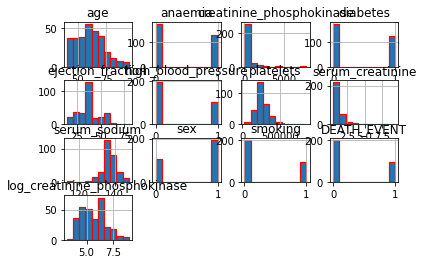

In [ ]:
df.hist(edgecolor='red',linewidth=1.2)

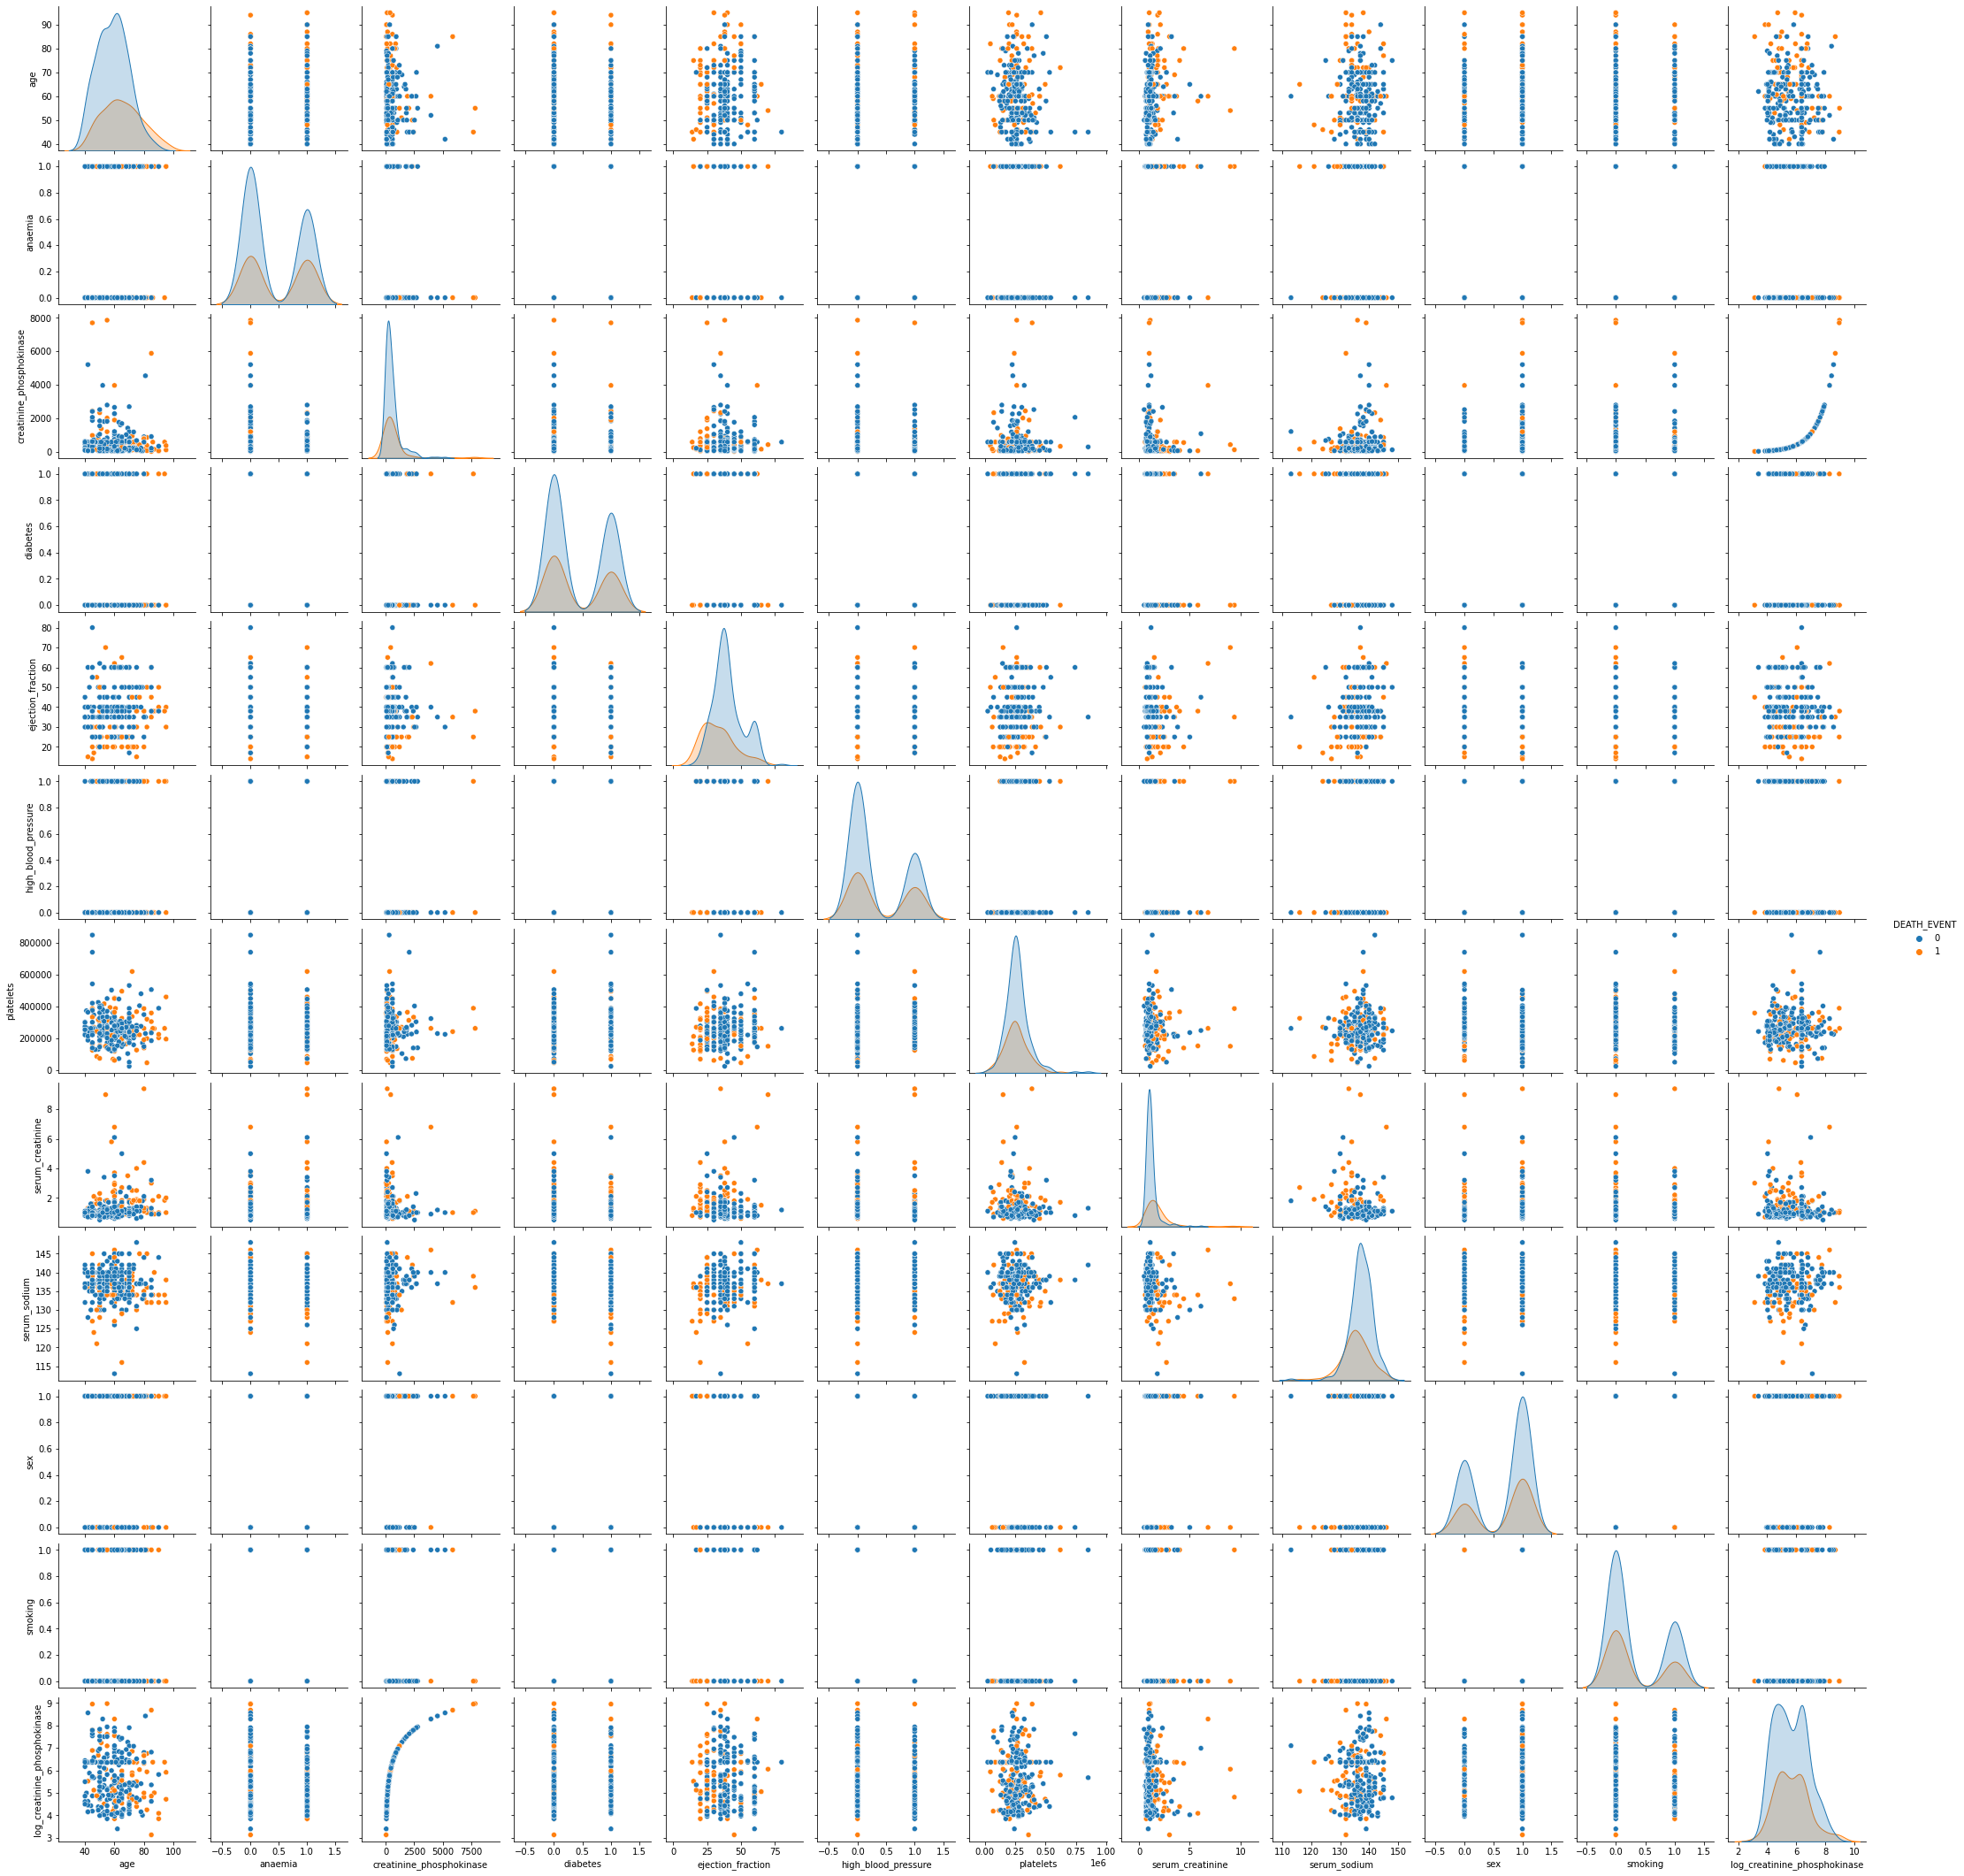

In [ ]:
sns.pairplot(df,hue='DEATH_EVENT')

In [ ]:
#Importando metricas para evaluacion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Separando los datos en varibles dependientes e independientes
x = df.iloc[:, :-1].values #corregir  
y = df.iloc[:,  -1].values #corregir

#Dividiendo el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 0)

In [ ]:
# FILTRO ajeccion menor al 50%
df_ejection_fraction_debajo =  df[df['ejection_fraction']<50]
df_ejection_fraction_debajo 
df_abajo_50 =  df_ejection_fraction_debajo[df_ejection_fraction_debajo['DEATH_EVENT']==1]['age'].count()
#FILTRO ejeccion mayor 50%
df_ejection_fraction_arriba =  df[df['ejection_fraction']>50]
df_arriba_50  =  df_ejection_fraction_arriba[df_ejection_fraction_arriba['DEATH_EVENT']==1]['age'].count()





# FILTRO Fuma o no fuma
df_fumadoresNo = df[df['smoking']==0]
df_fumadores = df[df['smoking']==1]
df_fumadores, df_fumadoresNo  = df_fumadores[df_fumadores['DEATH_EVENT']==1]['age'].count(), df_fumadores[df_fumadores['DEATH_EVENT']==0]['age'].count()
df_fumadoresNo

# FILTRO tiene anemia
df_anaemia = df[df['anaemia']==1]
df_anaemia  =  df_anaemia[df_anaemia['DEATH_EVENT']==1]['age'].count()
# FILTRO NO tiene anemia
df_anaemiaNo = df[df['anaemia']==0]
df_anaemiaNo  =  df_anaemiaNo[df_anaemiaNo['DEATH_EVENT']==0]['age'].count()
df_anaemiaNo


#Tiene problemas de hipertencion
df_high_blood_pressure  = df[df['high_blood_pressure']==1]
df_high_blood_pressure  =  df_high_blood_pressure[df_high_blood_pressure['DEATH_EVENT']==1]['age'].count()

#No tiene problemas de hipertencion
df_high_blood_pressureNo  = df[df['high_blood_pressure']==0]
df_high_blood_pressureNo  =  df_high_blood_pressureNo[df_high_blood_pressureNo['DEATH_EVENT']==1]['age'].count()
df_high_blood_pressure


39

La cantidad normal de plaquetas en la sangre es de 150,000 a 400,000 plaquetas por microlitro (mcL) o 150 a 400 × 109/L.

In [ ]:
relacion_anemia_plaquetas = df[df['high_blood_pressure']==1]
relacion_anemia_plaquetas  =  relacion_anemia_plaquetas[relacion_anemia_plaquetas['ejection_fraction']<50].count()
relacion_anemia_plaquetas



age                             81
anaemia                         81
creatinine_phosphokinase        81
diabetes                        81
ejection_fraction               81
high_blood_pressure             81
platelets                       81
serum_creatinine                81
serum_sodium                    81
sex                             81
smoking                         81
DEATH_EVENT                     81
log_creatinine_phosphokinase    81
dtype: int64

## valores normales de CPK en las personas
Si se presenta que tiene mayores niveles de cpk es por varias razones, por paros cardiacos, altos niveles de masa muscular, alcohol y consumo de medicamentos.

Hombres: CPK 49 – 348 IU/L

Mujeres: CPK 38 – 206 IU/L

FUENTES:
https://carefirst.staywellsolutionsonline.com/Spanish/RelatedItems/167,creatine_kinase_blood_ES 

https://www.melio.es/blog/creatinfosfoquinasa-cpk

In [ ]:
#Nivel de  FOSFOCINASA EN HOMBRES
df_creatinine_phosphokinase_H = df[df['sex']==1]
df_creatinine_phosphokinase_H = df[df['creatinine_phosphokinase']>348]
df_creatinine_phosphokinase_H  =  df_creatinine_phosphokinase_H[df_creatinine_phosphokinase_H['DEATH_EVENT']==1]['age'].count()


#Nivel de FOSFOCINASA EN MUJERES
df_creatinine_phosphokinase_M = df[df['sex']==0]
df_creatinine_phosphokinase_M = df[df['creatinine_phosphokinase']>206]
df_creatinine_phosphokinase_M  =  df_creatinine_phosphokinase_M[df_creatinine_phosphokinase_M['DEATH_EVENT']==1]['age'].count()

print(f'Hombres: {df_creatinine_phosphokinase_H}, Mujeres: {df_creatinine_phosphokinase_M}')

Hombres: 43, Mujeres: 56


## Creatinina en la sangre
Un resultado normal es de 0.7 a 1.3 mg/dL (de 61.9 a 114.9 µmol/L) para los hombres y de 0.6 a 1.1 mg/dL (de 53 a 97.2 µmol/L) para las mujeres.

Fuente: https://medlineplus.gov/spanish/ency/article/003475.htm#:~:text=Resultados%20normales&text=Un%20resultado%20normal%20es%20de,frecuentemente%20tienen%20menor%20masa%20muscular.

In [ ]:
# Este parece que no afecta en mayor medida
#No afecta en mayor medida en los problemas cardiacos a los hombres
df_serum_creatinine_H = df[df['serum_creatinine']<0.7]
df_serum_creatinine_H = df[df['serum_creatinine']>1.3]
df_serum_creatinine_H  =  df_serum_creatinine_H[df_serum_creatinine_H['DEATH_EVENT']==1]['age'].count()
df_serum_creatinine_H


#En las mujeres si afecta si los resultados son inferiores al rango o mayores
df_serum_creatinine_M = df[df['serum_creatinine']<0.6]
df_serum_creatinine_M = df[df['serum_creatinine']>1.1]
df_serum_creatinine_M  =  df_serum_creatinine_M[df_serum_creatinine_M['DEATH_EVENT']==1]['age'].count()
df_serum_creatinine_M

63

## Sodio en la sangre
La hipernatremia es un desequilibrio electrolítico con un nivel alto de sodio en la sangre. El valor normal de sodio en los adultos es de 136 a 145 mEq/L. El sodio es un elemento, mejor dicho un electrolito, que se encuentra en la sangre.

Fuente:https://chemocare.com/es/chemotherapy/side-effects/Hipernatremia.aspx#:~:text=El%20valor%20normal%20de%20sodio,136%20a%20145%20mEq%2FL.

In [ ]:
#Nivel de sodio mayor 
#Cuando es mayor no afecta
df_serum_sodium_mayor = df[df['serum_sodium']>145]
df_serum_sodium_mayor  =  df_serum_sodium_mayor[df_serum_sodium_mayor['DEATH_EVENT']==1]['age'].count()
#Nivel de sodio inferior
#si afecta si es menor
df_serum_sodium_menor = df[df['serum_sodium']<136]
df_serum_sodium_menor  =  df_serum_sodium_menor[df_serum_sodium_menor['DEATH_EVENT']==1]['age'].count()
df_serum_sodium_mayor

1

Creacion del contador

In [ ]:
table_values = pd.DataFrame()
table_values['']= None,None
table_values

,
0,None
1,None


In [ ]:
table_values = table_values.assign(ejection_fraction_arriba = df_arriba_50)
table_values = table_values.assign(ejection_fraction_debajo = df_abajo_50)
table_values = table_values.assign(fumadoresNo= df_fumadoresNo)
table_values = table_values.assign(anaemia= df_anaemia)
table_values = table_values.assign(anaemiaNo= df_anaemiaNo)
table_values = table_values.assign(high_blood_pressure= df_high_blood_pressure)
table_values = table_values.assign(high_blood_pressureNo=df_high_blood_pressureNo)
table_values = table_values.assign(creatinine_phosphokinase_H=df_creatinine_phosphokinase_H)
table_values = table_values.assign(creatinine_phosphokinase_M=df_creatinine_phosphokinase_M)
table_values = table_values.assign(serum_creatinine_H=df_serum_creatinine_H)
table_values = table_values.assign(serum_creatinine_M=df_serum_creatinine_M)
table_values = table_values.assign(serum_sodium_mayor=df_serum_sodium_mayor)
table_values = table_values.assign(serum_sodium_menor=df_serum_sodium_menor)

table_values


,,ejection_fraction_arriba,ejection_fraction_debajo,fumadoresNo,anaemia,anaemiaNo,high_blood_pressure,high_blood_pressureNo,creatinine_phosphokinase_H,creatinine_phosphokinase_M,serum_creatinine_H,serum_creatinine_M,serum_sodium_mayor,serum_sodium_menor
0,None,8,82,66,46,120,39,57,43,56,47,63,1,48
1,None,8,82,66,46,120,39,57,43,56,47,63,1,48


high_blood_pressure=
https://www.mayoclinic.org/es-es/diseases-conditions/high-blood-pressure/symptoms-causes/syc-20373410

ejection_fraction=https://www.mayoclinic.org/es-es/tests-procedures/ekg/expert-answers/ejection-fraction/faq-20058286#:~:text=La%20fracci%C3%B3n%20de%20eyecci%C3%B3n%20es,determinar%20c%C3%B3mo%20funciona%20el%20coraz%C3%B3n.

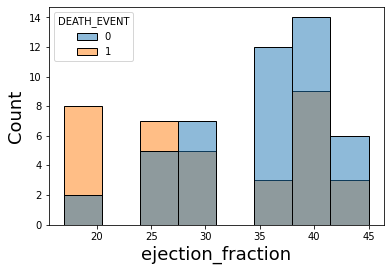

In [ ]:
Q7_df = df[(df['ejection_fraction']<50) & (df['high_blood_pressure']==1)]

plt.xlabel('ejection_fraction', fontsize=18)# set xlabel
plt.ylabel('Count', fontsize=18) # set ylabel
sns.histplot(Q7_df, x='ejection_fraction', hue = 'DEATH_EVENT')

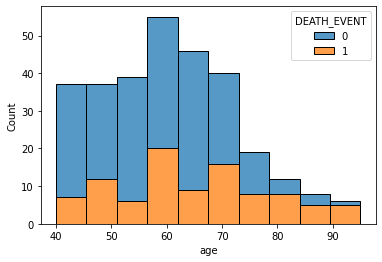

In [ ]:
# CANTIDAD DE MUERTES POR EDAD
sns.histplot(data=df, x="age", hue="DEATH_EVENT", multiple="stack")

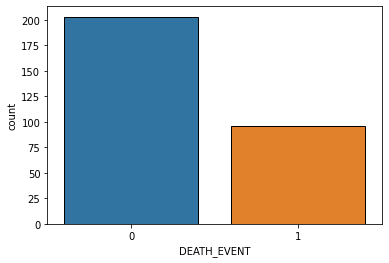

In [ ]:
# CUENTA LAS MUERTES EN TOTAL
sns.countplot(data=df, x="DEATH_EVENT")

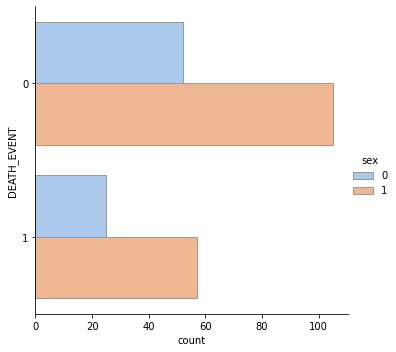

In [ ]:
#HOMBRES O MUJERES CON PORCENTAJE DE CONTRACCION ALTA Y QUE FUMAN
sns.catplot(data=df_ejection_fraction_debajo, y='DEATH_EVENT', hue="sex", kind="count",palette="pastel", edgecolor=".6")

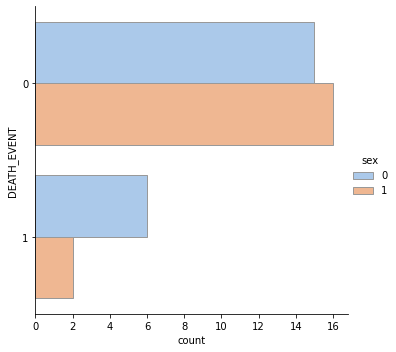

In [ ]:
#HOMBRES O MUJERES CON PORCENTAJE DE CONTRACCION ALTA Y QUE FUMAN
sns.catplot(data=df_ejection_fraction_arriba, y='DEATH_EVENT', hue="sex", kind="count",palette="pastel", edgecolor=".6")

In [ ]:
media_edad=base_datos.apply(np.mean, "age")
mediana_edad=base_datos.apply(np.median, "age")
media_creatinine_phosphokinase=base_datos.apply(np.mean, "creatinine_phosphokinase")
mediana_creatinine_phosphokinase=base_datos.apply(np.median, "creatinine_phosphokinase")
media_ejection_fraction=base_datos.apply(np.mean, "ejection_fraction")
mediana_ejection_fraction=base_datos.apply(np.median, "ejection_fraction")
media_serum_creatinine=base_datos.apply(np.mean, "serum_creatinine")
mediana_serum_creatinine=base_datos.apply(np.median, "serum_creatinine")
media_serum_sodium=base_datos.apply(np.mean, "serum_sodium")
mediana_serum_sodium=base_datos.apply(np.median, "serum_sodium")

media = []
mediana = []

media_edad=np.mean(media_edad)
media.append(media_edad)
mediana_edad=np.median(mediana_edad)
mediana.append(mediana_edad)

media_creatinine_phosphokinase=np.mean(media_creatinine_phosphokinase)
media.append(media_creatinine_phosphokinase)
mediana_creatinine_phosphokinase=np.median(mediana_creatinine_phosphokinase)
mediana.append(mediana_creatinine_phosphokinase)

media_ejection_fraction=np.mean(media_ejection_fraction)
media.append(media_ejection_fraction)
mediana_ejection_fraction=np.median(mediana_ejection_fraction)
mediana.append(mediana_ejection_fraction)

media_serum_creatinine=np.mean(media_serum_creatinine)
media.append(media_serum_creatinine)

mediana_serum_creatinine=np.median(mediana_edad)
mediana.append(media_serum_creatinine)

media_serum_sodium=np.mean(media_serum_sodium)
media.append(media_serum_sodium)
mediana_serum_sodium=np.median(mediana_serum_sodium)
mediana.append(mediana_serum_sodium)

tabla = Table().with_columns("media",media,"mediana",mediana)
tabla

media,mediana
60.8339,60
581.839,250
38.0836,38
1.39388,1.39388
136.625,137


## 2.1 Analisis Descriptivo

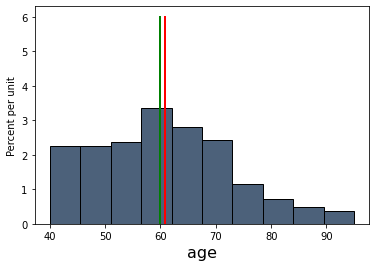

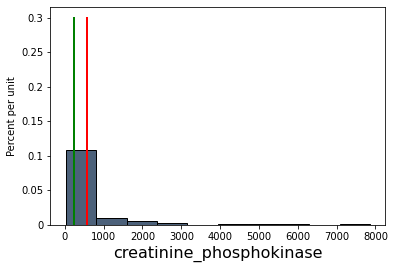

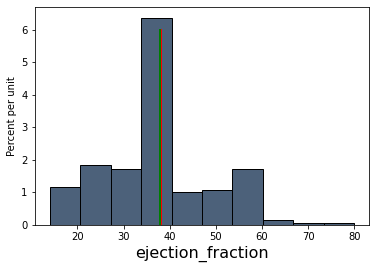

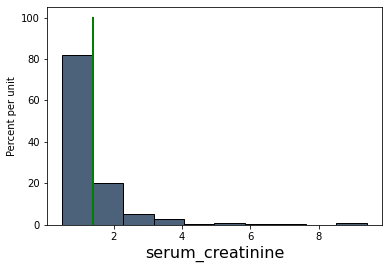

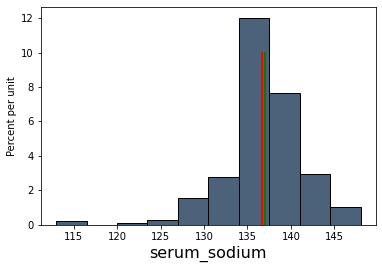

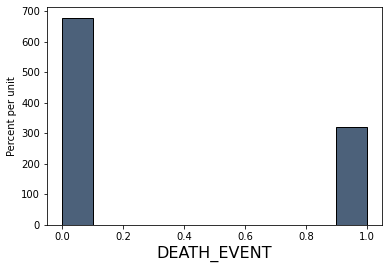

In [ ]:
base_datos.hist("age")
plt.plot([media[0],media[0]],(0,6/100),color="red",lw=2)
plt.plot([mediana[0],mediana[0]],(0,6/100),color="green",lw=2)
base_datos.hist("creatinine_phosphokinase")

plt.plot([media[1],media[1]],(0,0.3/100),color="red",lw=2)
plt.plot([mediana[1],mediana[1]],(0,0.3/100),color="green",lw=2)
base_datos.hist("ejection_fraction")

plt.plot([media[2],media[2]],(0,6/100),color="red",lw=2)
plt.plot([mediana[2],mediana[2]],(0,6/100),color="green",lw=2)
base_datos.hist("serum_creatinine")

plt.plot([media[3],media[3]],(0,100/100),color="red",lw=2)
plt.plot([mediana[3],mediana[3]],(0,100/100),color="green",lw=2)
base_datos.hist("serum_sodium")

plt.plot([media[4],media[4]],(0,10/100),color="red",lw=2)
plt.plot([mediana[4],mediana[4]],(0,10/100),color="green",lw=2)
base_datos.hist("DEATH_EVENT")

## introduccion

en el campo de la medicina se realiza la recopilacion de datos medicos de los pacientes, estos datos tienen el fin de ser analizado para validar el estado de salud de un paciente, a partir de estos datos los medicos y personas especializadas en el area de la medicinna pueden presentar a sus pacientes si padecen de enfermedades o complicaciones medicas.

## ¿Es posible predecir problemas cardiacos con datos medicos?

Problema que se desea resolver.

## A partir del analizis de datos ¿Es posible encontrar fatores de riesgo que incidan en el desarollo de problemas caridiacos?

Pregunta de investigación.

## Objetivo general

A partir de los datos medicos presentados, realizar un estudio para encontrar los factores que producen problemas cardiacos.

## Objetivos especificos

1) realizar el estudio y la exploracion de los datos seleccionados.

2) encontrar los factores que inciden en el desarrollo de problemas cardiacos.

3) a partir de los datos analizados, concluir los fatores determinates que inciden en el desarrollo de problemas cardiacos.

In [ ]:
#'ejection_fraction','sex','DEATH_EVENT','serum_sodium'

In [ ]:
df_muerte_X = df.drop(columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','high_blood_pressure', 'platelets','serum_creatinine', 'smoking', 'predicted','DEATH_EVENT'])
df_muerte_X

,ejection_fraction,serum_sodium,sex,log_creatinine_phosphokinase
0,20,130,1,6.366470
1,38,136,1,8.969669
2,20,129,1,4.983607
3,20,137,1,4.709530
4,20,116,0,5.075174
...,...,...,...,...
294,38,143,1,4.110874
295,38,139,0,7.506592
296,60,138,0,7.630461
297,38,140,1,7.788626


In [ ]:
#PRUEBA
df_prueba = df.drop(columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','high_blood_pressure', 'platelets','serum_creatinine', 'smoking', 'predicted'])
df_prueba

,ejection_fraction,serum_sodium,sex,DEATH_EVENT,log_creatinine_phosphokinase
0,20,130,1,1,6.366470
1,38,136,1,1,8.969669
2,20,129,1,1,4.983607
3,20,137,1,1,4.709530
4,20,116,0,1,5.075174
...,...,...,...,...,...
294,38,143,1,0,4.110874
295,38,139,0,0,7.506592
296,60,138,0,0,7.630461
297,38,140,1,0,7.788626


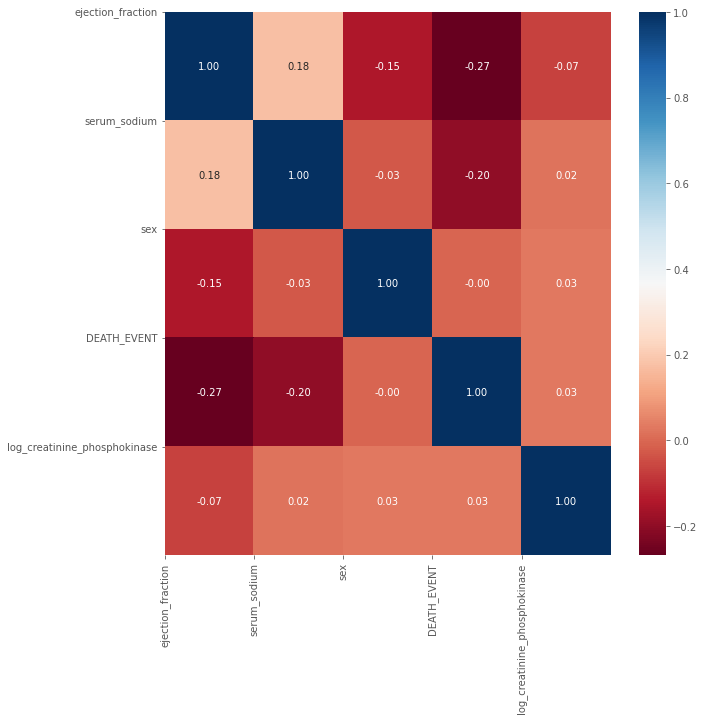

In [ ]:
#PRUEBA
corrprueba = df_prueba.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corrprueba, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corrprueba.columns)), corrprueba.columns);
plt.yticks(range(len(corrprueba.columns)), corrprueba.columns)
plt.show()
#El problema es si esta por encima del -0.6 y las que tenemos esta mayormente menor a -0.2

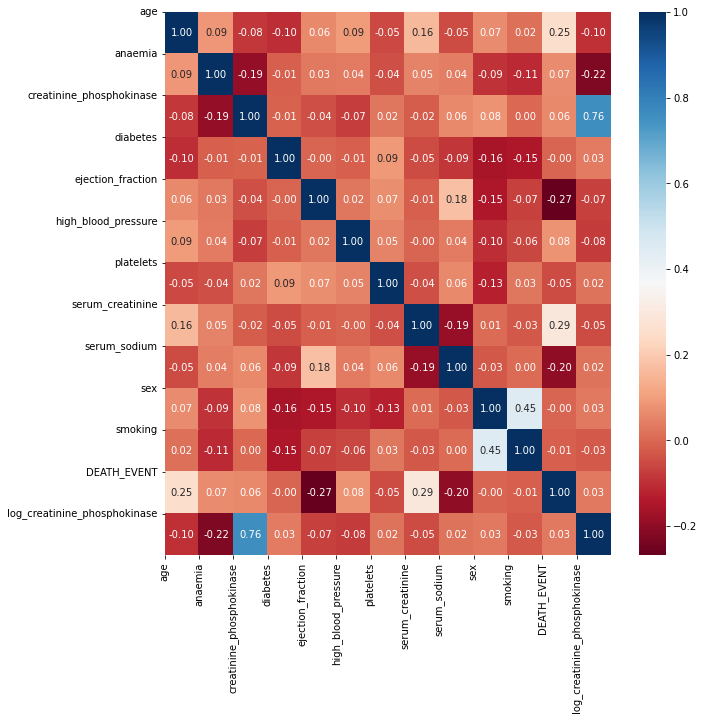

In [ ]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()
#El problema es si esta por encima del -0.6 y las que tenemos esta mayormente menor a -0.2

In [ ]:
#PRUEBA
#Este modelo ya esta clasificado
Y1 = df_prueba['DEATH_EVENT']
X1 = df_muerte_X
X1.head()

,ejection_fraction,serum_sodium,sex,log_creatinine_phosphokinase
0,20,130,1,6.366470
1,38,136,1,8.969669
2,20,129,1,4.983607
3,20,137,1,4.709530
4,20,116,0,5.075174


In [ ]:
#PRUEBA
LOGISTIC_DEATH = sm.logit(formula="Y1 ~ X1", data=df).fit()
LOGISTIC_DEATH.summary()

Optimization terminated successfully.
         Current function value: 0.575742
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Y1   No. Observations:                  299
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            4
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                 0.08274
Time:                        20:54:52   Log-Likelihood:                -172.15
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 2.983e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9564      4.256      2.809      0.005       3.614      20.299
X1[0]         -0.0528      0.013     -4.108      0.000      -0.078      -0.028
X1[1]         -0.0798      0.031     -2.570      0.010      -0.141      -0.019
X1[2]         -0.2280      0.278     -0.821      0.412      -0.772       0.316
X1[3]          0.0469      0.116      0.406      0.685      -0.180       0.273
==============================================================================
"""

In [ ]:
#PRUEBA
### create a confussion matrix
df['predicted'] = LOGISTIC_DEATH.predict(df)
df['predicted'] = df['predicted'].apply(lambda x: 1 if x>0.5 else 0)
## count the number of true and false
predic=df['predicted'].value_counts()
observ=df['DEATH_EVENT'].value_counts()

## data frame for confussion matrix
confusion_matrix = pd.crosstab(df['DEATH_EVENT'], df['predicted'])
confusion_matrix

predicted,0,1
DEATH_EVENT,,
0,190,13
1,72,24


In [ ]:
#IMPORTANTE
## regresion model log_crim vs all other variables
Y=df['DEATH_EVENT']
## extract variabls from df 1:13
X=df.iloc[:,0:11]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


In [ ]:
import scipy as sc
import statsmodels.formula.api as sm

In [ ]:
LOGISTIC_DEATH = sm.logit(formula="Y ~ X", data=df).fit()
LOGISTIC_DEATH.summary()

Optimization terminated successfully.
         Current function value: 0.492108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                  0.2160
Time:                        20:55:47   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9643      4.601      1.079      0.281      -4.054      13.982
X[0]           0.0557      0.013      4.241      0.000       0.030       0.081
X[1]           0.4179      0.301      1.389      0.165      -0.172       1.008
X[2]           0.0003      0.000      2.034      0.042    1.06e-05       0.001
X[3]           0.1514      0.297      0.509      0.611      -0.431       0.734
X[4]          -0.0703      0.015     -4.731      0.000      -0.099      -0.041
X[5]           0.4189      0.306      1.369      0.171      -0.181       1.019
X[6]       -7.094e-07   1.62e-06     -0.439      0.661   -3.88e-06    2.46e-06
X[7]           0.6619      0.173      3.817      0.000       0.322       1.002
X[8]          -0.0567      0.033     -1.698      0.090      -0.122       0.009
X[9]          -0.3990      0.351     -1.137      0.255      -1.087       0.289
X[10]          0.1356      0.349      0.389      0.697      -0.548       0.819
==============================================================================
"""

In [ ]:
### create a confussion matrix
df['predicted'] = LOGISTIC_DEATH.predict(df)
df['predicted'] = df['predicted'].apply(lambda x: 1 if x>0.5 else 0)
## count the number of true and false
predic=df['predicted'].value_counts()
observ=df['DEATH_EVENT'].value_counts()

## data frame for confussion matrix
confusion_matrix = pd.crosstab(df['DEATH_EVENT'], df['predicted'])
confusion_matrix

predicted,0,1
DEATH_EVENT,,
0,183,20
1,49,47


In [ ]:
#anemia
#serum_sodium
#eject_fraction